In [1]:
# imports
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
# local
import wrangle as w
import big_wrangle as bw

In [2]:
# df = bw.wrangle_wildfires()

In [3]:
df = w.wrangle_wildfires()
df_backup = df
df.shape

(49026, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49026 entries, 0 to 49025
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         49026 non-null  object 
 1   time                         49026 non-null  int64  
 2   cause_class                  49026 non-null  object 
 3   cause                        49026 non-null  object 
 4   fire_size                    49026 non-null  float64
 5   fire_size_class              49026 non-null  object 
 6   lat                          49026 non-null  float64
 7   long                         49026 non-null  float64
 8   elevation_mean               49026 non-null  float64
 9   county                       49026 non-null  object 
 10  trees_per_acre_mean          49026 non-null  float64
 11  percent_chance_water_nearby  49026 non-null  float64
 12  most_common_species_group    49026 non-null  object 
 13  height_mean     

In [5]:
df = df_backup
df.describe(datetime_is_numeric=True).T

,count,mean,std,min,25%,50%,75%,max
time,49026.0,1409.292824,524.571543,0.000000,1144.000000,1448.000000,1744.000000,2359.000000
fire_size,49026.0,5.318143,39.864245,0.010000,0.100000,0.200000,1.000000,993.000000
lat,49026.0,35.239862,1.964945,32.543500,33.808639,34.414777,36.697943,40.911944
long,49026.0,-118.457311,1.686285,-122.781944,-119.723891,-118.063706,-117.145000,-114.206400
elevation_mean,49026.0,4943.458195,1978.072419,0.000000,3473.752311,5004.347826,6793.506494,8900.000000
trees_per_acre_mean,49026.0,10.840988,8.173683,0.999188,5.088425,8.939179,13.599759,51.612184
percent_chance_water_nearby,49026.0,0.323269,0.309007,0.000000,0.000000,0.262473,0.498542,1.000000
height_mean,49026.0,44.652786,17.876928,9.000000,29.372093,41.333333,60.561616,120.373333
diameter_mean,49026.0,16.252615,5.489503,4.474194,11.862736,16.219534,19.380435,40.633334
percent_trees_alive,49026.0,0.847835,0.129058,0.000000,0.772358,0.866667,0.928571,1.000000


In [6]:
df.head()

,date,time,cause_class,cause,fire_size,fire_size_class,lat,long,elevation_mean,county,...,percent_invasive_plant,co_mean,temp_mean,humidity_mean,wind_direction_mean,wind_speed_mean,month,day_of_year,six_cali,most_common_is_hardwood
0,2001-07-26,500,human,missing data/not specified/undetermined,0.2,a,39.017778,-120.716667,5350.684932,placer,...,0.591324,0.276540,75.562500,53.166667,164.541667,4.645834,7,207,north_cali,0
1,2001-09-08,2100,human,other causes,0.2,a,39.169167,-120.218056,5350.684932,placer,...,0.591324,0.316666,72.354166,45.625000,163.208333,3.479166,9,251,north_cali,0
2,2001-07-23,1730,natural,natural,1.0,b,39.167778,-120.250278,5350.684932,placer,...,0.591324,0.269318,79.166666,41.083333,184.270834,3.020833,7,204,north_cali,0
3,2001-04-01,1400,human,smoking,0.2,a,38.883889,-120.135278,5033.219178,el dorado,...,0.635274,0.262107,46.555556,52.250000,176.930556,3.805556,4,91,north_cali,0
4,2001-06-25,430,human,smoking,0.1,a,38.851944,-120.017778,5033.219178,el dorado,...,0.635274,0.203442,59.854167,35.541667,184.979166,3.552084,6,176,north_cali,0


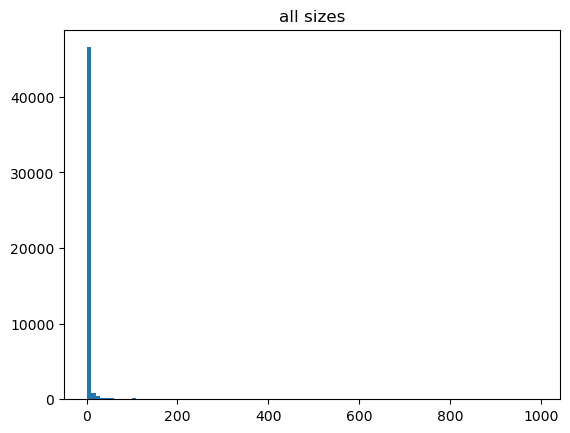

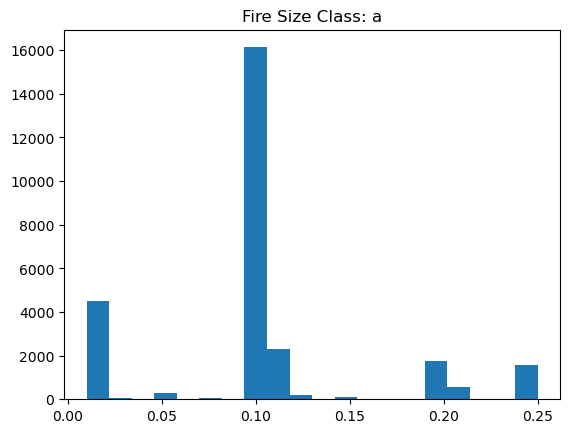

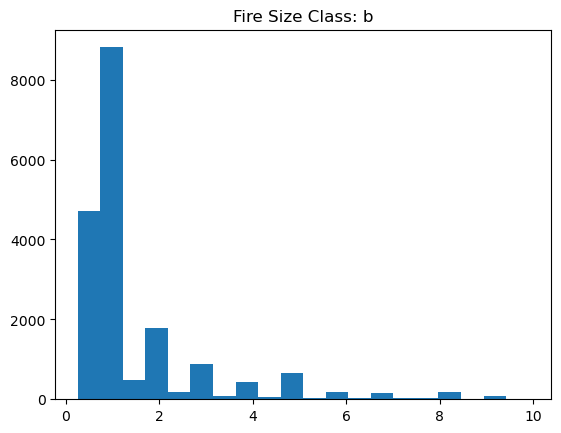

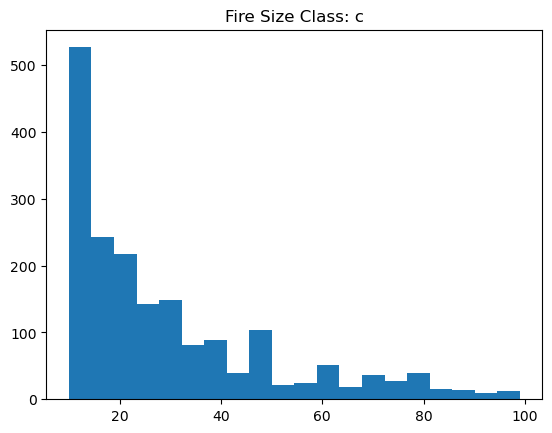

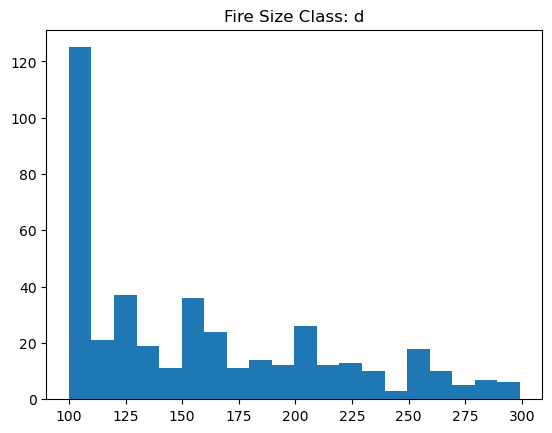

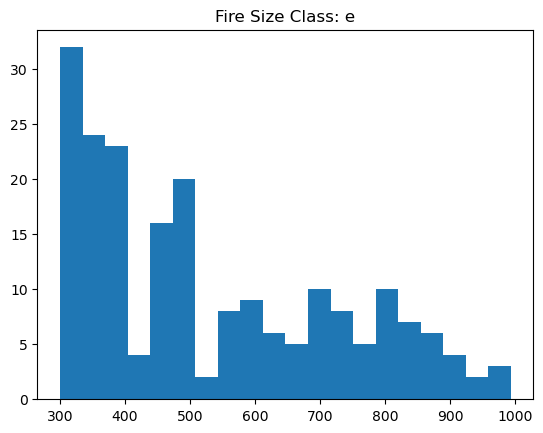

In [7]:
# most fires are smaller tah 5 acres (would be pretty bad otherwise)
plt.hist(df.fire_size,bins=100)
plt.title('all sizes')
plt.show()
# plt.hist(df[df.fire_size<100].fire_size,bins=20)
# plt.title('less than 10 acres')
# plt.show()
# plt.hist(df[df.fire_size>=100].fire_size,bins=50)
# plt.title('10 acres and more')
# plt.show()
for sc in df.fire_size_class.value_counts().index.to_list():
    plt.hist(df[df.fire_size_class==sc].fire_size,bins=20)
    plt.title(f'Fire Size Class: {sc}')
    plt.show()

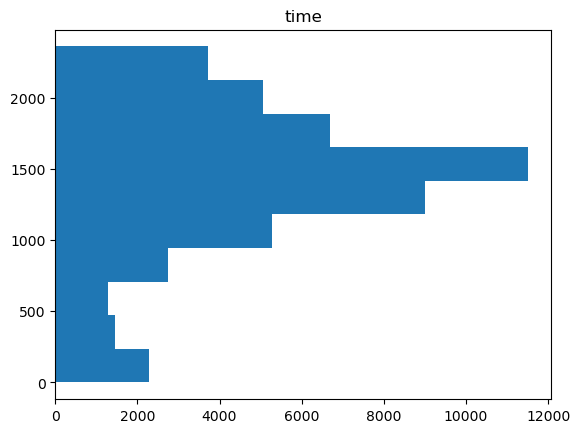

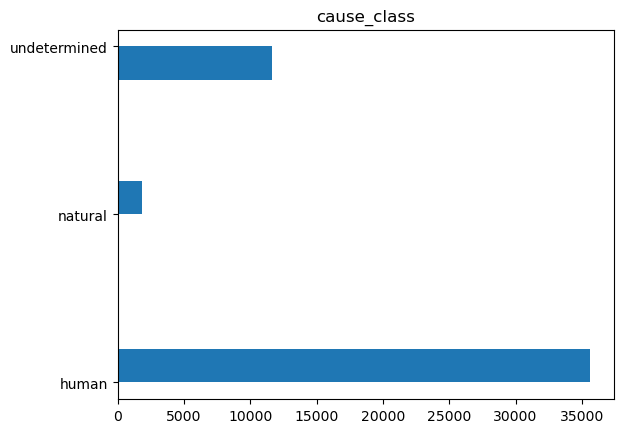

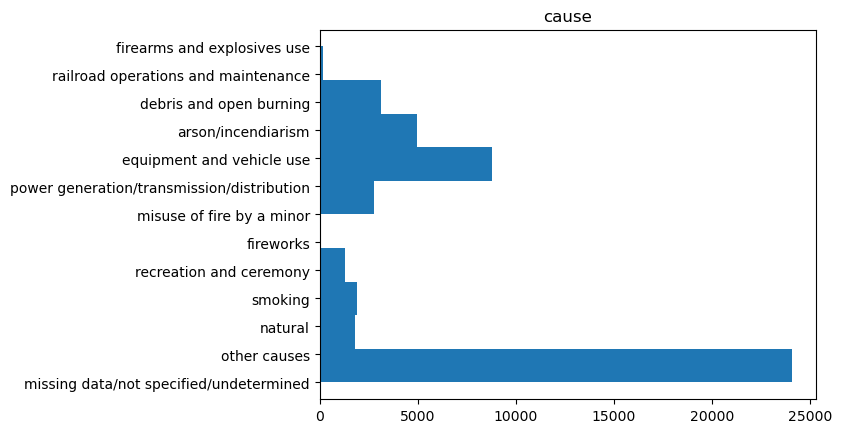

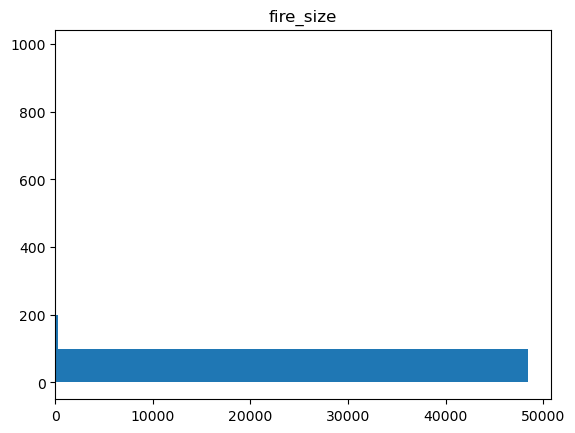

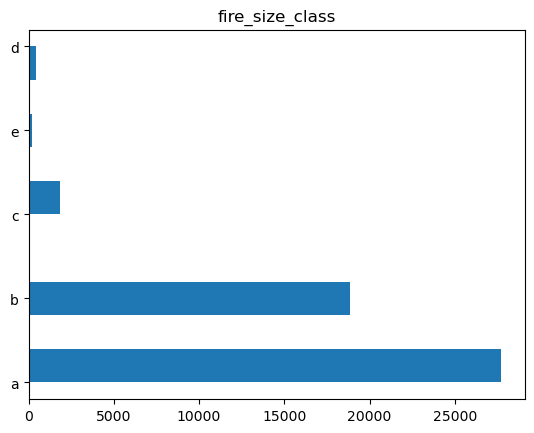

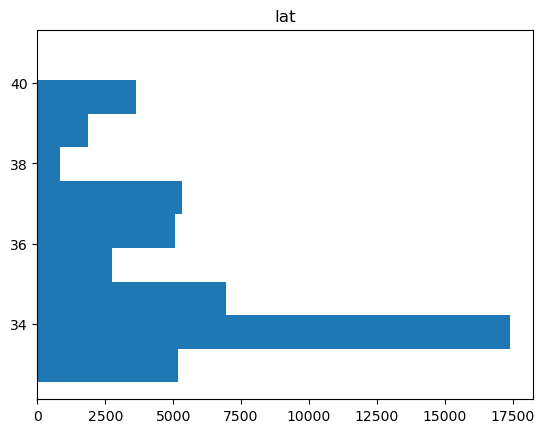

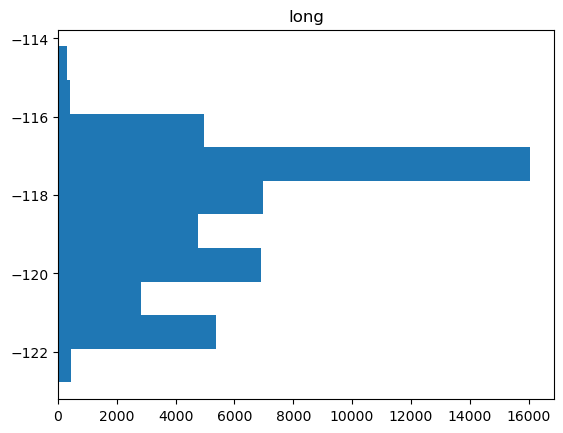

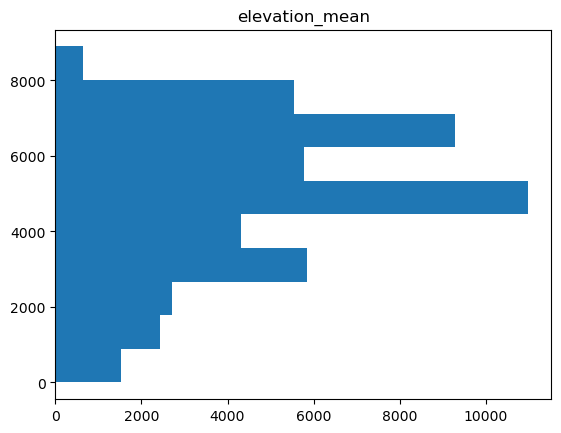

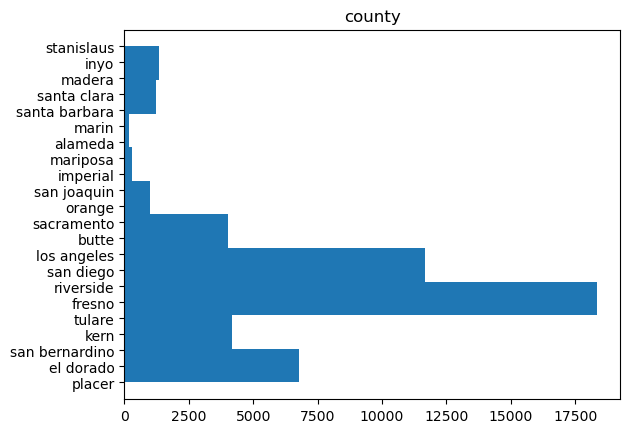

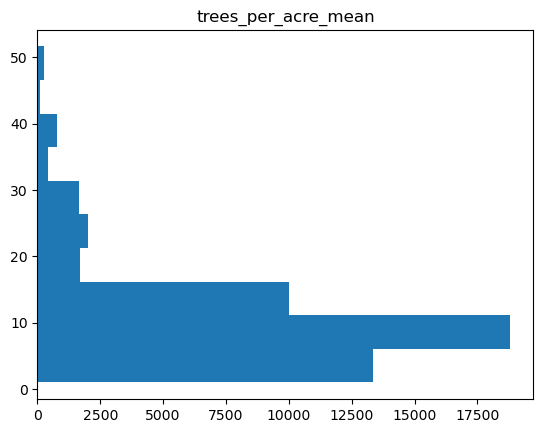

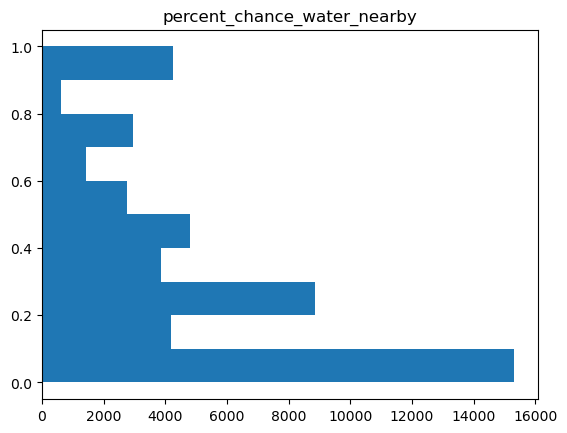

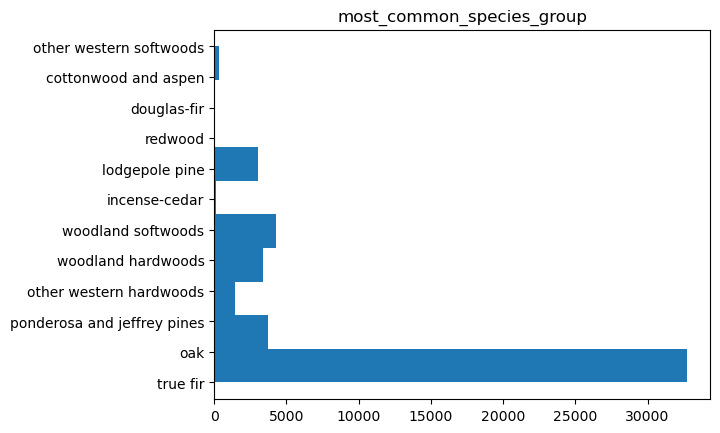

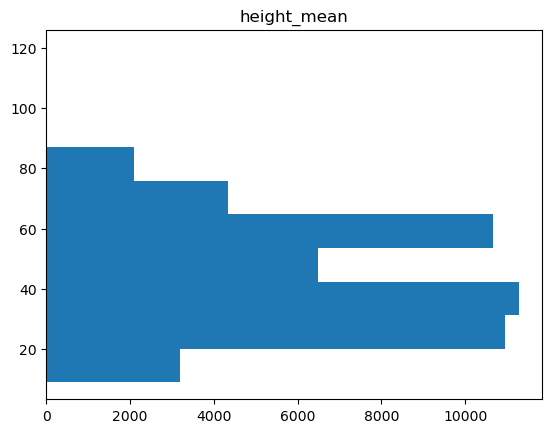

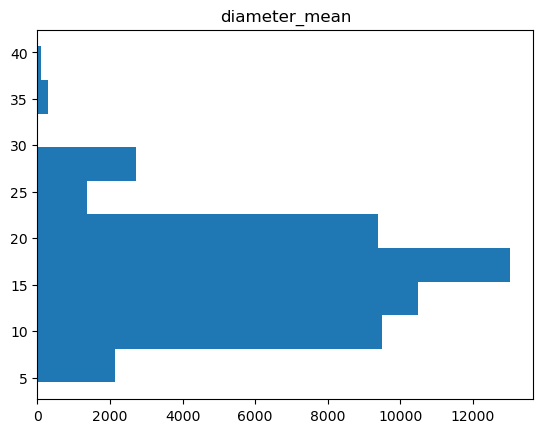

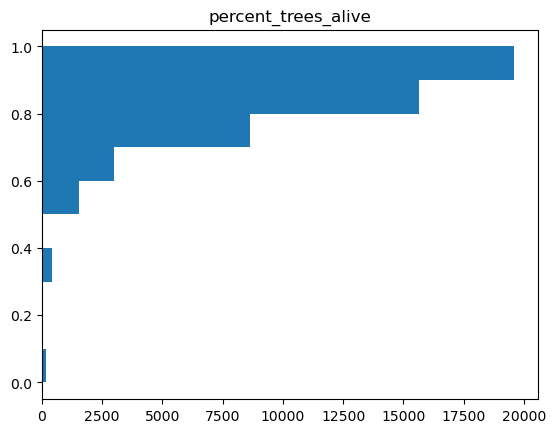

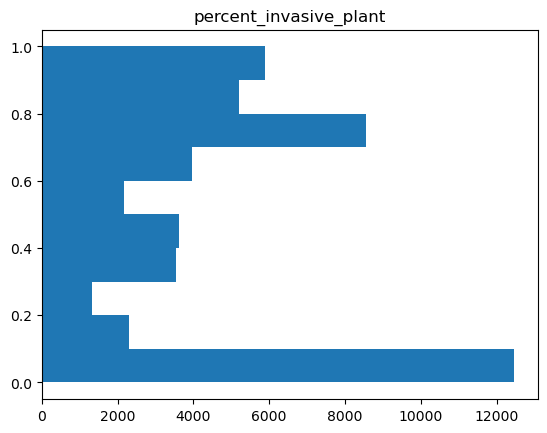

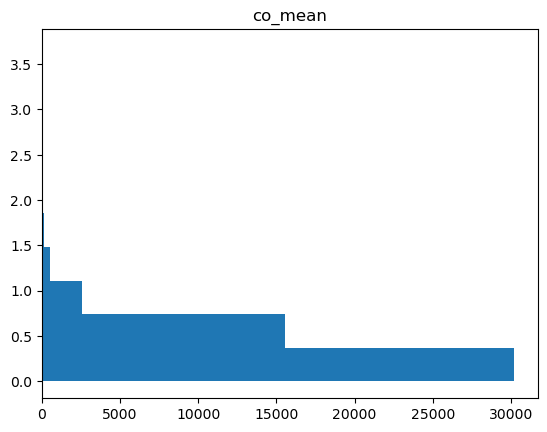

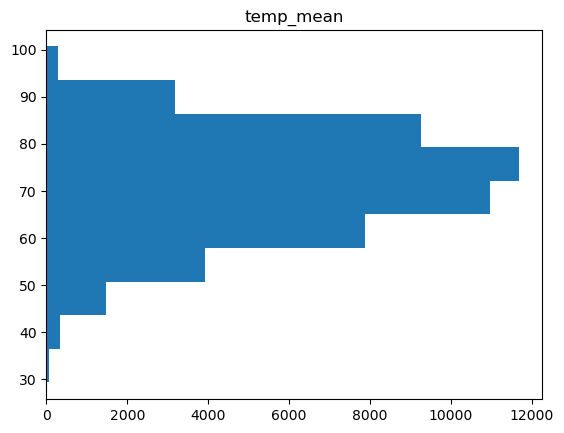

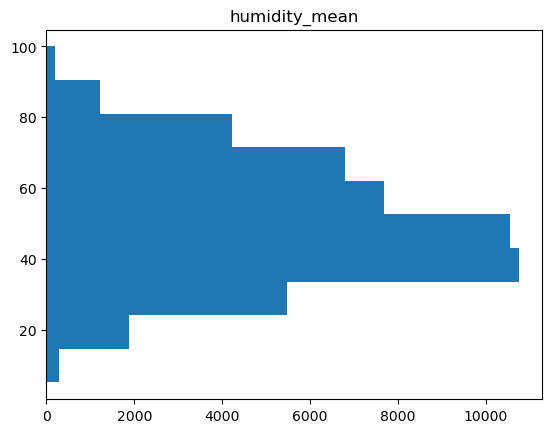

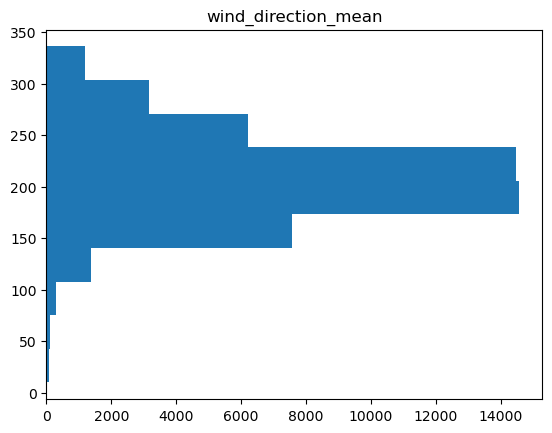

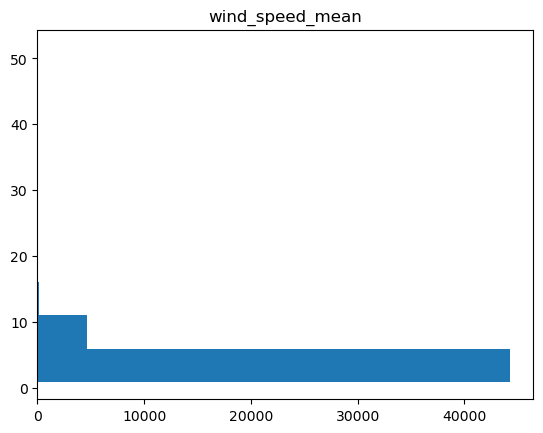

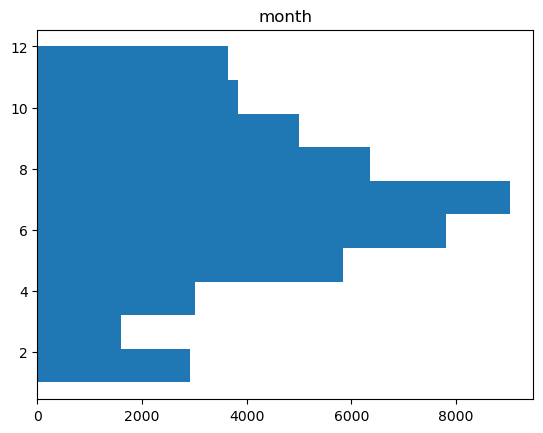

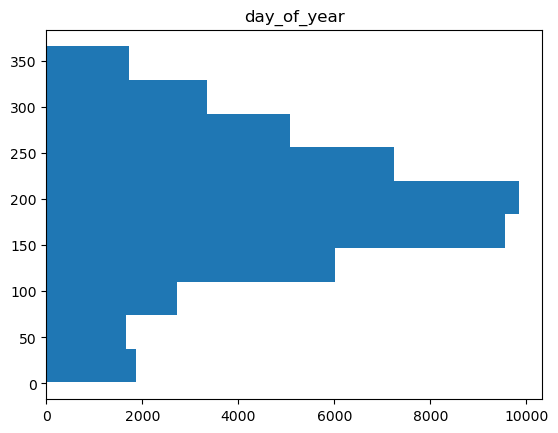

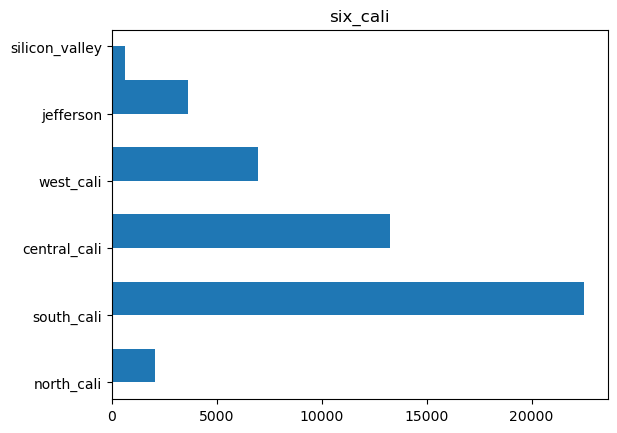

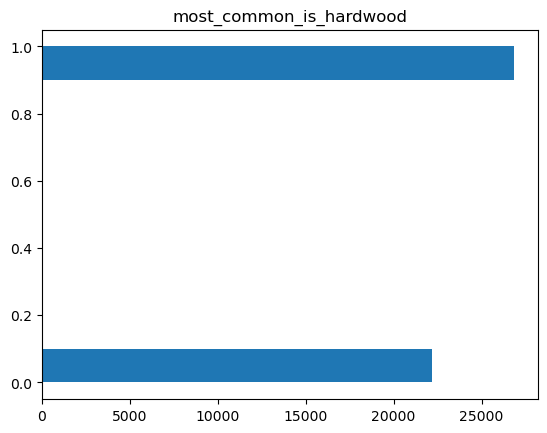

In [8]:
for col in df.columns[1:]:
    plt.hist(x=df[col],orientation='horizontal')
    plt.title(col)
    plt.show()

In [9]:
train, val, test = w.split_data(df)
train.shape

(29415, 26)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29415 entries, 42305 to 33280
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         29415 non-null  object 
 1   time                         29415 non-null  int64  
 2   cause_class                  29415 non-null  object 
 3   cause                        29415 non-null  object 
 4   fire_size                    29415 non-null  float64
 5   fire_size_class              29415 non-null  object 
 6   lat                          29415 non-null  float64
 7   long                         29415 non-null  float64
 8   elevation_mean               29415 non-null  float64
 9   county                       29415 non-null  object 
 10  trees_per_acre_mean          29415 non-null  float64
 11  percent_chance_water_nearby  29415 non-null  float64
 12  most_common_species_group    29415 non-null  object 
 13  height_mean 

In [11]:
train.head()

,date,time,cause_class,cause,fire_size,fire_size_class,lat,long,elevation_mean,county,...,percent_invasive_plant,co_mean,temp_mean,humidity_mean,wind_direction_mean,wind_speed_mean,month,day_of_year,six_cali,most_common_is_hardwood
42305,2017-06-19,652,natural,natural,0.1,a,35.435800,-115.698900,4768.292683,san bernardino,...,0.260163,0.435818,86.447024,34.713542,199.807292,3.637500,6,170,south_cali,0
40689,2016-07-04,1713,undetermined,missing data/not specified/undetermined,0.1,a,33.781896,-116.995451,5819.402985,riverside,...,0.686567,0.094779,82.265530,37.546296,233.427500,4.943750,7,186,south_cali,1
45649,2017-06-11,1505,undetermined,missing data/not specified/undetermined,0.5,b,37.018333,-119.668333,5830.731707,madera,...,0.612195,0.100000,60.104167,53.229167,283.981250,5.937500,6,162,central_cali,0
15839,2006-07-09,1815,human,missing data/not specified/undetermined,1.0,b,34.375700,-118.516700,1900.000000,los angeles,...,1.000000,0.253595,77.809524,70.322916,216.390837,3.125811,7,190,west_cali,1
21300,2007-04-07,2334,undetermined,missing data/not specified/undetermined,0.1,a,37.968052,-121.270813,2700.000000,san joaquin,...,0.000000,0.065851,61.937500,69.291667,262.708333,3.708333,4,97,central_cali,1


/var/folders/ml/8_q6055n29vf0c36kmj6w1900000gn/T/ipykernel_83520/3819518063.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(train.corr()['fire_size']).sort_values(ascending = False)[1:].plot(kind='bar')


<Axes: >

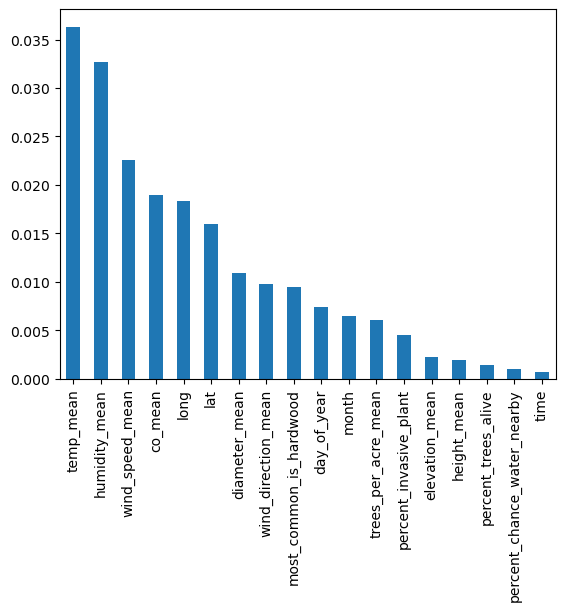

In [12]:
# plt.figure(figsize=(12,4))
# fc = 'g'
# abs(train[train.fire_size_class==fc].corr()['fire_size']).sort_values(ascending = False)[1:].plot(kind='bar', title=fc)
abs(train.corr()['fire_size']).sort_values(ascending = False)[1:].plot(kind='bar')
# for sc in train.fire_size_class.value_counts().index.to_list():
#     plt.figure(figsize=[10,6])
#     exam_corr = round(train[train.fire_size_class==sc].corr(method='spearman',numeric_only=True),2)
#     sns.heatmap(exam_corr, cmap='PRGn', annot=True)
#     plt.title(f'Fire Size Class: {sc} and data shape: {train[train.fire_size_class==sc].shape[0]}')
#     plt.show()
# humid, temp, wind_spd, dia

In [13]:
def pear(train, x, y, alt_hyp='two-sided'):
    '''Spearman's R test with a print'''
    r,p = stats.spearmanr(train[x], train[y], alternative=alt_hyp)
    print(f"Spearman's R: {x} and {y}\n", f'r = {r}, p = {p}')

Spearman's R: wind_direction_mean and fire_size
 r = 0.035106246474513485, p = 1.716338961742877e-09


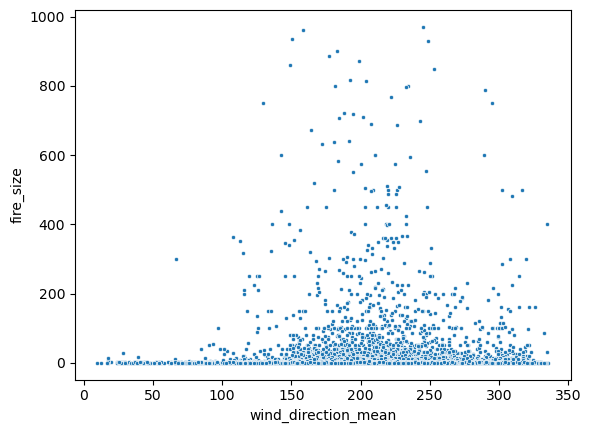

In [14]:
# wind_dir
pear(train, 'wind_direction_mean', 'fire_size')
sns.scatterplot(data=train,x='wind_direction_mean',y='fire_size',marker='.')
plt.show()

Spearman's R: time and fire_size
 r = -0.022553563086345926, p = 0.00010953185254689951


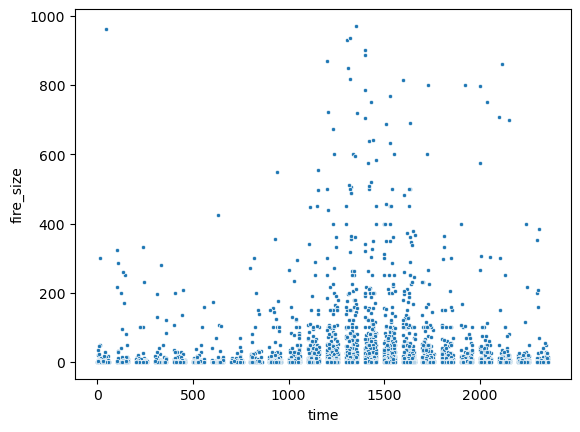

In [15]:
# time
pear(train, 'time', 'fire_size')
sns.scatterplot(data=train,x='time',y='fire_size',marker='.')
plt.show()

Spearman's R: humidity_mean and fire_size
 r = -0.02058084267886851, p = 0.0004155543747899636


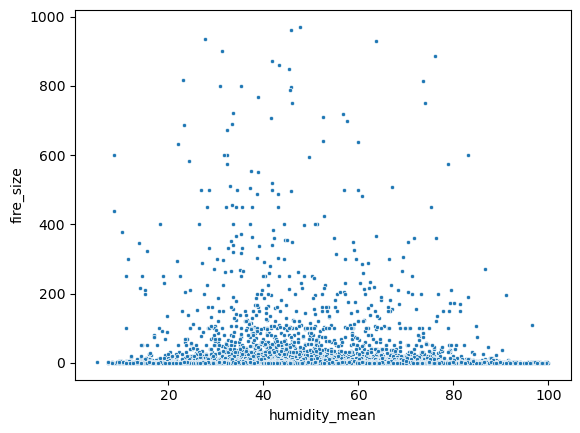

In [16]:
# humidity
pear(train, 'humidity_mean', 'fire_size')
sns.scatterplot(data=train,x='humidity_mean',y='fire_size',marker='.')
plt.show()

Spearman's R: temp_mean and fire_size
 r = 0.08005528978118515, p = 4.98052207682677e-43


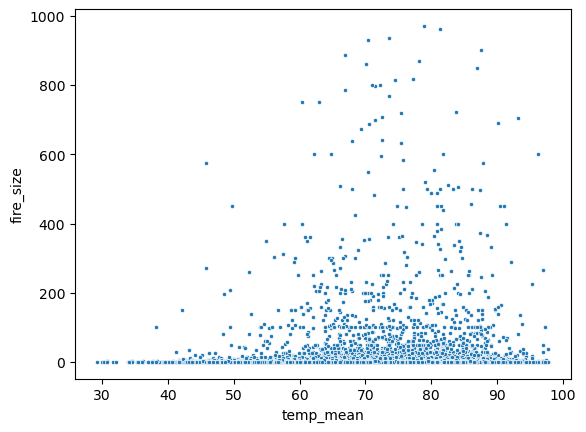

In [17]:
# temp
pear(train, 'temp_mean', 'fire_size')
sns.scatterplot(data=train,x='temp_mean',y='fire_size',marker='.')
plt.show()

Spearman's R: percent_trees_alive and fire_size
 r = 0.025799388288752487, p = 9.628585163532279e-06


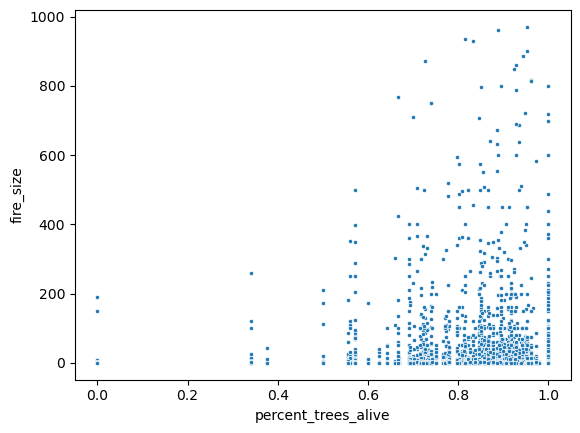

In [18]:
# alive
pear(train, 'percent_trees_alive', 'fire_size')
sns.scatterplot(data=train,x='percent_trees_alive',y='fire_size',marker='.')
plt.show()

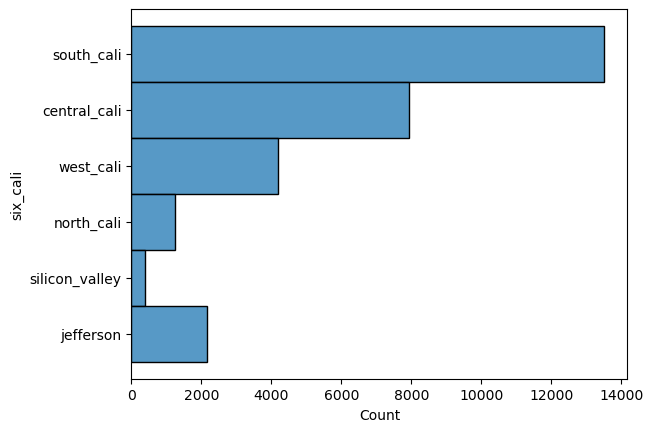

In [19]:
sns.histplot(data=train,y='six_cali')
plt.show()

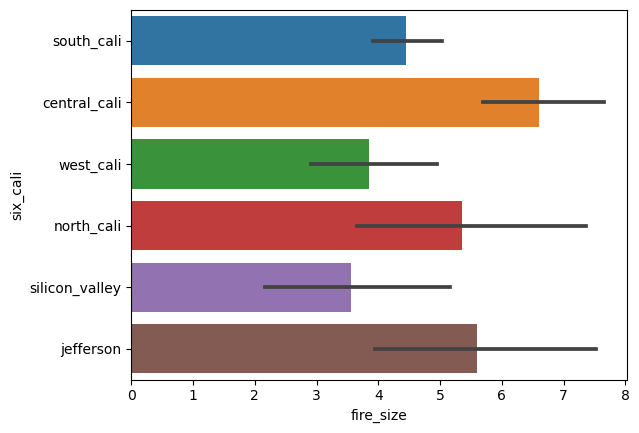

In [20]:
sns.barplot(data=train,y='six_cali',x='fire_size')
plt.show()

In [21]:
# ventura had biggest fire
train.groupby('six_cali').fire_size.mean().sort_values()
# sns.barplot(data=train[train.county!='ventura county'],y='county',x='fire_size')
# plt.show()

six_cali
silicon_valley    3.555000
west_cali         3.849507
south_cali        4.444177
north_cali        5.356223
jefferson         5.597072
central_cali      6.608775
Name: fire_size, dtype: float64

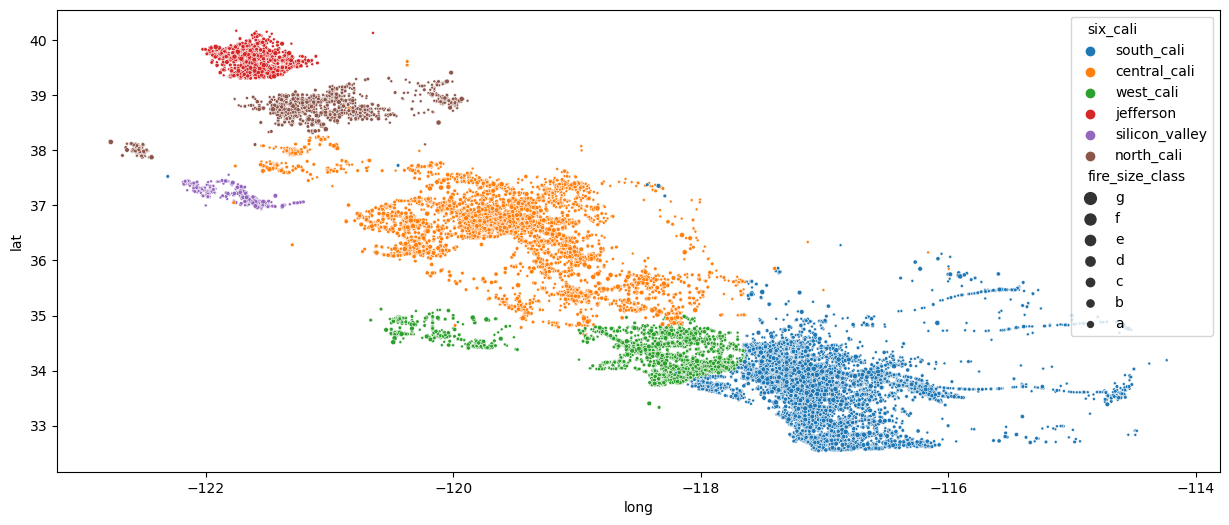

In [22]:
# lat long fire size
plt.figure(figsize=(15,6))
sns.scatterplot(data=train.sort_values(['fire_size_class'],ascending=[True]),x='long',y='lat',size='fire_size_class',size_order=['g','f','e','d','c','b','a'],marker='.',hue='six_cali')
plt.show()

Kruskal-Wallis H-Test:
 stat = 267.6997997414239, p = 7.408445371923476e-59


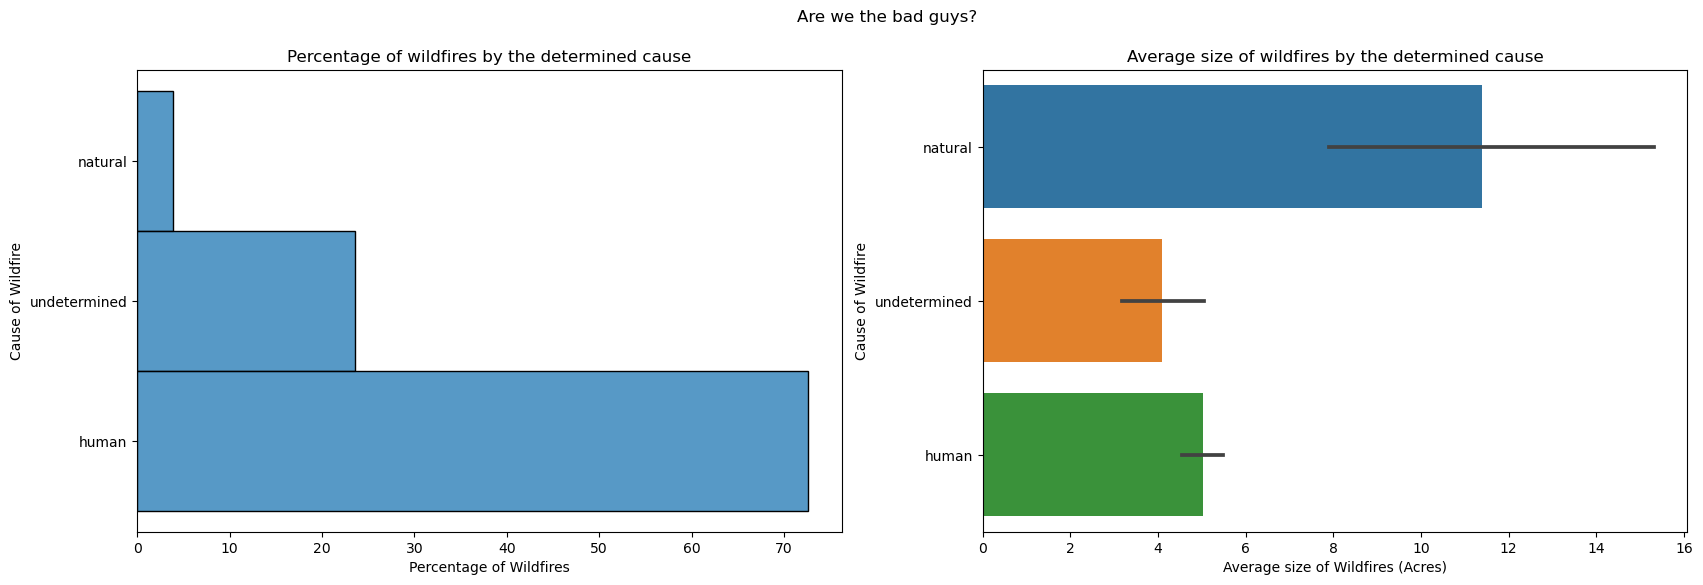

In [23]:
import explore as e
e.nova(train[train.cause_class=='human'].fire_size,train[train.cause_class=='natural'].fire_size,train[train.cause_class=='undetermined'].fire_size)
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.histplot(data=train,y='cause_class',stat='percent')
plt.title('Percentage of wildfires by the determined cause')
plt.ylabel('Cause of Wildfire')
plt.xlabel('Percentage of Wildfires')
plt.subplot(122)
sns.barplot(data=train,y='cause_class',x='fire_size')
plt.title('Average size of wildfires by the determined cause')
plt.ylabel('Cause of Wildfire')
plt.xlabel('Average size of Wildfires (Acres)')
plt.suptitle('Are we the bad guys?')
plt.show()

In [24]:
(train.cause_class=='human').sum()*train.groupby('cause_class').fire_size.mean().loc['human']-(train.cause_class=='natural').sum()*train.groupby('cause_class').fire_size.mean().loc['natural']

94733.76

early model testing

In [35]:
import modeling as m
def all_feature_model(model,X_train,y_train,X_val,y_val):
    '''Input model type along with train and validate data and
    it will return RMSE and R2 results per the selected model'''
    if model == 'lr':
        # model
        lr = LinearRegression()
        lr.fit(X_train,y_train)
        # metrics
        pred_lr_tr = lr.predict(X_train)
        rmse_tr,r2_tr = m.metrics_reg(y_train,pred_lr_tr)
        pred_lr_v = lr.predict(X_val)
        rmse_v,r2_v = m.metrics_reg(y_val,pred_lr_v)
        print('Linear Regression')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    elif model == 'poly':
        # polynomial feature regression
        pf = PolynomialFeatures(degree=4)
        X_train_pf = pf.fit_transform(X_train)
        X_val_pf = pf.transform(X_val)
        # model
        pr = LinearRegression()
        pr.fit(X_train_pf,y_train)
        # metrics
        pred_pr_tr = pr.predict(X_train_pf)
        rmse_tr,r2_tr = m.metrics_reg(y_train,pred_pr_tr)
        pred_pr_v = pr.predict(X_val_pf)
        rmse_v,r2_v = m.metrics_reg(y_val,pred_pr_v)
        print('Polynomial Features through Linear Regression')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    elif model == 'lasso':
        # model
        ll = LassoLars(alpha=1)
        ll.fit(X_train,y_train)
        # metrics
        pred_ll_tr = ll.predict(X_train)
        rmse_tr,r2_tr = m.metrics_reg(y_train,pred_ll_tr)
        pred_ll_v = ll.predict(X_val)
        rmse_v,r2_v = m.metrics_reg(y_val,pred_ll_v)
        print('Lasso Lars')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    else:
        print('Please include model argument: lr, poly, lasso')

In [26]:
# split into X and y
X_train,X_val,X_test = train.drop(columns=['fire_size','fire_size_class','date']),val.drop(columns=['fire_size','fire_size_class','date']),test.drop(columns=['fire_size','fire_size_class','date'])
y_train,y_val,y_test = train[['fire_size']],val[['fire_size']],test[['fire_size']]

# Standard Scaler
Xs_train,Xs_val,Xs_test = w.std(X_train,X_val,X_test,X_train.select_dtypes(exclude='object').columns)

In [33]:
all_feature_model('lr',Xs_train,y_train,Xs_val,y_val)

Linear Regression
Train       RMSE: 37.01   R2: 0.0035
Validate    RMSE: 45.06    R2: 0.0038


In [36]:
all_feature_model('lasso',Xs_train,y_train,Xs_val,y_val)

Lasso Lars
Train       RMSE: 37.06   R2: 0.0007
Validate    RMSE: 45.14    R2: 0.0003


In [37]:
all_feature_model('poly',Xs_train,y_train,Xs_val,y_val)

Polynomial Features through Linear Regression
Train       RMSE: 31.65   R2: 0.2713
Validate    RMSE: 1388518808.09    R2: -945916718031353.0
